<a href="https://colab.research.google.com/github/NecipOz/dwpython/blob/main/Statistics_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Statistics Assignment-5 (Hypothesis Tests)



**EXERCISE 1.** The hourly wages in a particular industry are normally distributed with mean \$13.20 and standard deviation \$2.50. A company in this industry employs 40 workers, paying them an average of \$12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)


H0 \: mu - 12.20 = 0

H1 \: 12.20 - mu < 0

One-tail t-test.

In [16]:
mean_diff = 12.20-13.20
std_sample = 2.5/np.sqrt(40)
t = mean_diff/std_sample
p = stats.t.cdf(x=t, df=39)
print("t=",t," ; p=",p)

t= -2.5298221281347035  ; p= 0.0077816812266594355


p<0.01 So null hypothesis is rejected. As a result this company can be accused of paying substandard wages.

**EXERCISE 2.**Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?



In [62]:
soil = pd.read_excel('soil.xlsx')
soil

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [67]:
stats.levene(soil.Soil1[:30],soil.Soil2)

LeveneResult(statistic=0.44125049944636346, pvalue=0.5089435186798983)

In [ ]:
# Levene Test: p<0.05 so equal variance assumed.

# H0 : mu1 = mu2
# H1 : mu1 != mu2

In [68]:
t, p = stats.ttest_ind(soil.Soil1[:30],soil.Soil2, equal_var=True)
t, p

(4.862205111770914, 8.075995113067924e-06)

In [70]:
print(f"t = {t:.3f}, p = {p:.3f} ")

t = 4.862, p = 0.000 


In [ ]:
# Reject null hypothesis. The soils differ with respect 
# to average shear strength, at the 1% significance level. (t=4.862, p<0.01)


**EXERCISE 3.** The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

1. Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
2. Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

In [72]:
pisa = pd.read_csv("2015 PISA Test - Sheet1.csv")
pisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [74]:
pisa.Continent_Code.value_counts()

EU    37
AS    17
SA     7
OC     2
AF     2
Name: Continent_Code, dtype: int64

In [112]:
pisa.groupby("Continent_Code").agg(["count","mean","median","std", stats.mode, stats.skew, stats.kurtosis]).T

Continent_Code                                  AF  ...                 SA
internet_users_per_100 count                     2  ...                  7
                       mean              43.359918  ...          60.180494
                       median            43.359918  ...             64.289
                       std                7.297226  ...           9.772455
                       mode          ([38.2], [1])  ...      ([40.9], [1])
                       skew                   -0.0  ...          -1.133557
                       kurtosis               -2.0  ...           0.190202
Math                   count                     2  ...                  7
                       mean               363.2121  ...           402.8877
                       median             363.2121  ...           409.0333
                       std                5.099513  ...          18.128894
                       mode      ([359.6062], [1])  ...  ([377.0695], [1])
                       skew                    0.0  ...          -0.287201
                       kurtosis               -2.0  ...          -1.568354
Reading                count                     2  ...                  7
                       mean               355.4574  ...         425.359229
                       median             355.4574  ...           425.3031
                       std                7.916909  ...          19.709688
                       mode      ([349.8593], [1])  ...  ([397.5414], [1])
                       skew                    0.0  ...           0.251128
                       kurtosis               -2.0  ...          -0.504861
Science                count                     2  ...                  7
                       mean              381.07425  ...         421.747186
                       median            381.07425  ...           424.5905
                       std                7.536556  ...          18.470319
                       mode      ([375.7451], [1])  ...  ([396.6836], [1])
                       skew                   -0.0  ...          -0.159758
                       kurtosis               -2.0  ...          -1.257179

[28 rows x 5 columns]

In [114]:
matheu = pisa[pisa["Continent_Code"]=="EU"].Math
mathas = pisa[pisa["Continent_Code"]=="AS"].Math

In [ ]:
# H0 : mu_eu = mu_as
# H1 : mu_eu != mu_as

In [115]:
t, p = stats.ttest_ind(matheu,mathas, equal_var=True)
t, p

(0.870055317967983, 0.38826888111307345)

In [116]:
print(f"t = {t:.3f}, p = {p:.3f} ")

t = 0.870, p = 0.388 


In [ ]:
# Fail to reject null hypothesis. There is no significance difference between 
# European (EU) and Asian (AS) math scores.

In [118]:
df = pisa[(pisa["Continent_Code"]=="EU") | (pisa["Continent_Code"]=="AS")]


In [123]:
df.sample()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
39,LBN,AS,74.0,396.2497,346.549,386.4854


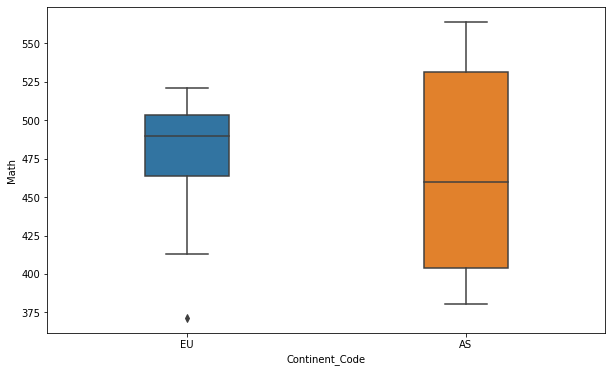

In [130]:
plt.figure(figsize=(10,6))
sns.boxplot(y="Math", x=df["Continent_Code"], data=df, width=0.3);

**EXERCISE 4.**The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.



In [133]:
student = pd.read_csv("students_2014 - students_2014.csv")
student.head()

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,Sprint,MileMinDur,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,NaN,NaN,NaN,NaN,0.0,0,72.35,NaN,0.0,7.978,NaN,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278,1/1/1995,NaN,NaN,NaN,Philosophy,0.0,0,70.66,179.20,0.0,8.004,0:06:21,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389,12/31/1994,NaN,NaN,NaN,NaN,0.0,0,70.68,198.52,0.0,NaN,0:07:00,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820,12/1/1994,NaN,NaN,NaN,business administration,1.0,0,NaN,198.34,NaN,8.473,0:12:44,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559,11/10/1994,NaN,NaN,NaN,NaN,1.0,1,67.43,128.17,2.0,NaN,0:06:25,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0


In [136]:
# H0 : mu1 = mu2
# H1 : mu1 != mu2

t, p = stats.ttest_rel(student.Math, student.English, nan_policy="omit")
print(f"t = {t:.3f}, p = {p:.3f} ")

t = -36.313, p = 0.000 


In [ ]:
# Null hypothesis rejected. There is a significant difference between Math and English scores. (t = -36.313, p<0.05)